
# Problem Statement:
The problem statement of financial sentiment analysis dataset is to predict the sentiment of financial news articles or social media posts related to financial markets or specific financial instruments, such as stocks or currencies.This dataset consists of text data, which is labeled as positive, negative or neutral based on the sentiment of the content. The sentiment may be related to the overall market sentiment or specific to a particular company, product or event. The goal of financial sentiment analysis is to extract insights from the large volumes of unstructured data generated by financial news and social media, and to provide an early warning system for investors and traders to make informed decisions. By analyzing the sentiment of news articles and social media posts, financial institutions can better understand the impact of news events on the financial markets, predict market trends and make more informed investment decisions.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data=pd.read_csv('data.csv')

In [39]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [40]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [41]:

data.describe(include='all')

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [42]:
data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [43]:
data.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

In [44]:
data.duplicated().sum()


np.int64(6)

In [45]:
data.drop_duplicates(inplace=True)

In [46]:
data['Sentiment'].value_counts()

Sentiment
neutral     3124
positive    1852
negative     860
Name: count, dtype: int64

In [47]:
neutral=0
positive= 0
negative= 0
for i in data['Sentiment']:
    if i == 'neutral':
        neutral += 1
    elif i == 'positive':
        positive += 1
    elif i == 'negative':
        negative += 1
total_count = len(data)
neutral_percent = format((neutral / total_count) * 100, '.2f')
positive_percent = format((positive / total_count) * 100, '.2f')
negative_percent = format((negative / total_count) * 100, '.2f')

print(f'{neutral_percent}% people have neutral sentiment')
print(f'{positive_percent}% people have positive sentiment')
print(f'{negative_percent}% people have negative sentiment')


53.53% people have neutral sentiment
31.73% people have positive sentiment
14.74% people have negative sentiment


<Axes: xlabel='Sentiment', ylabel='count'>

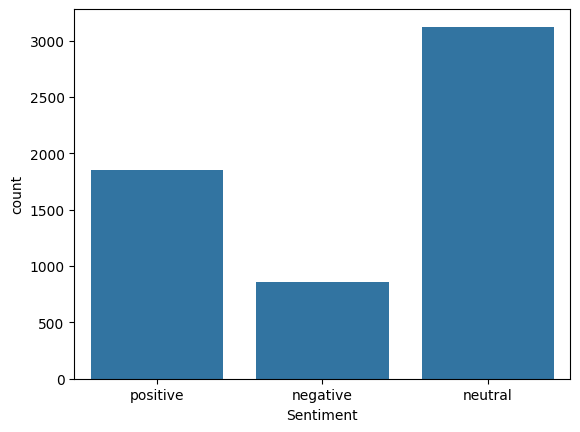

In [48]:
sns.countplot(x='Sentiment',data=data)

In [49]:
X = data['Sentence']
Y = data['Sentiment']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
# Conversion of text to vector

v = CountVectorizer(stop_words='english')
X_train = v.fit_transform(X_train)
X_test = v.transform(X_test)

In [51]:
multNB = MultinomialNB()
multNB.fit(X_train,Y_train)
Y_pred = multNB.predict(X_test)

In [52]:
accuracy_score(Y_test,Y_pred)

0.672945205479452